<a href="https://colab.research.google.com/github/nguyendoanquangnhat/KERAS/blob/main/AI_W9_31_03_23_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ANN - MNIST

train images: (60000, 28, 28)
test images: (10000, 28, 28)
test labels: (10000,)
train labels: (60000,)
Số này là: 7


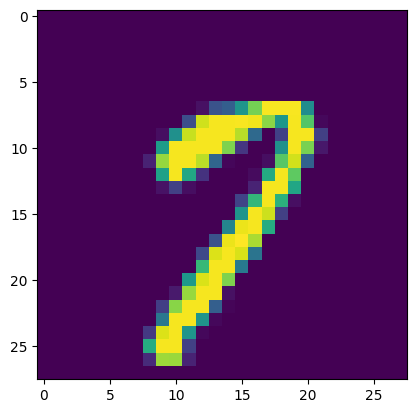

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
print('train images:', train_images.shape)
print('test images:', test_images.shape)
print('test labels:', test_labels.shape)
print('train labels:', train_labels.shape)

digit=train_images[9999]
plt.imshow(digit)
#plt.show
print('Số này là:',train_labels[9999])

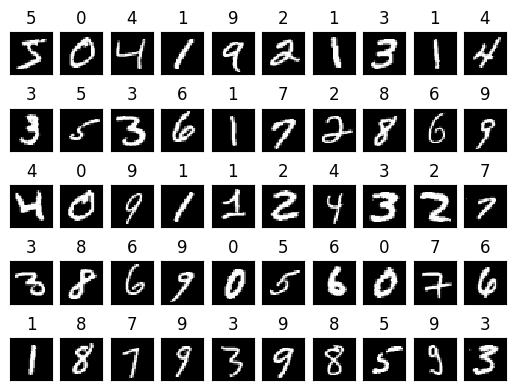

In [ ]:
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.tight_layout
  plt.imshow(train_images[i],cmap='gray',interpolation='None')
  plt.title('{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [ ]:
from keras.models import Sequential     #Sequential: mô tả mạng ANN theo tuần tự
from keras.layers import Dense          #Dense: full connected

model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_images=train_images.reshape((60000,28*28))
train_images=train_images.astype('float32')/255
test_images=test_images.reshape((10000,28*28))
test_images=test_images.astype('float32')/255

#to_categorical: chuyển dữ liệu 1 bit -> nhiều bits
from keras.utils import to_categorical
train_labels=to_categorical(train_labels,10)
test_labels=to_categorical(test_labels,10)
print(train_labels)
train_labels.shape

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


(60000, 10)

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])  #loss: hao phi; metrics: do luong
model.fit(train_images,train_labels,epochs=10,batch_size=128)  #epochs: lan hoc ; batch_size: so luong du lieu trong 1 lan hoc
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Loss:',test_loss)
print('Accuracy:',test_acc)

Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.2637 - accuracy: 0.9237
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1068 - accuracy: 0.9684
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0714 - accuracy: 0.9783
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0522 - accuracy: 0.9844
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0387 - accuracy: 0.9884
Epoch 6/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0295 - accuracy: 0.9915
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0226 - accuracy: 0.9934
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0169 - accuracy: 0.9955
Epoch 9/10
469/469 [==============================] - 7s 15ms/step - loss: 0.0131 - accuracy: 0.9966
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0608 - accuracy: 

In [ ]:
X=test_images
Y=test_labels
X[1000]=X[1000].reshape((1,28*28))
X[1000]=X[1000].astype('float32')/255
print(X[1000].shape)
#Y_predict=model.predict(X[1000])
print(test_images.shape)

(784,)
(10000, 784)
